In [ ]:
 # prompt: import all libraries for logistic regression , with metric and numpy pandas , seaborn and standard Scalar

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# prompt: upload titanic data from seaborn

# Upload titanic dataset
titanic_data = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(titanic_data.head())

# Get basic information about the dataset
titanic_data.info()

# Get descriptive statistics of the dataset
print(titanic_data.describe())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [ ]:
titanic_data.isnull().sum()
titanic_data.drop('embark_town', axis=1, inplace=True)

In [ ]:
#data preprocessing


titanic_data = titanic_data.drop(columns='deck', axis=1)
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
print(titanic_data['embarked'].mode())
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)
titanic_data.replace({'sex':{'male':0,'female':1}}, inplace=True)


0    S
Name: embarked, dtype: object


<ipython-input-35-2861105001>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
<ipython-input-35-2861105001>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
for col in titanic_data.columns:
    if titanic_data[col].dtype == 'object' or titanic_data[col].dtype == 'category':
      titanic_data[col] = LabelEncoder().fit_transform(titanic_data[col])

In [ ]:
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict =model.predict(X_test)

In [ ]:

#evaluate the model
print('Accuracy:', accuracy_score(y_test, y_predict))
print('Precision:', precision_score(y_test, y_predict))
print('Recall:', recall_score(y_test, y_predict))
print('F1 Score:', f1_score(y_test, y_predict))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[105   0]
 [  0  74]]


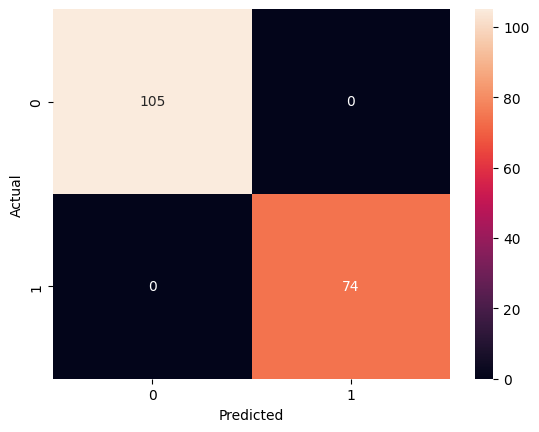

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_test.value_counts()

,count
survived,
0,105
1,74


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])